In [1]:
# -*- coding: utf-8 -*-
"""assign-quanti

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ejZQZEIl9VJ7bywASW2uU86EFLtbPEt0
"""

import math
import cv2
import numpy as np
from skimage.io import imread, imsave
from PIL import Image
import matplotlib.pyplot as plt
import math
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import os

In [3]:
from PopularitySampling import PopularitySampling

In [4]:
dir_data = "data/input/"
all_files = os.listdir(dir_data)
print([(x,y) for x,y in enumerate(all_files)])

[(0, 'art3.jpg'), (1, 'dith.png'), (2, 'art2.jpg'), (3, 'art.jpg'), (4, 'flower.jpg'), (5, 'oranges.jpg'), (6, 'mountain.jpg'), (7, 'human.jpg'), (8, 'loin.jpg'), (9, 'splas.jpeg'), (10, 'giraffe.jpg')]


In [47]:
image_num  = 7
input_filename_wo_dir = all_files[image_num]
input_file_name = dir_data+input_filename_wo_dir

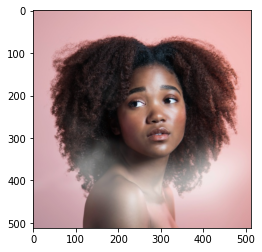

In [48]:
orig_img = cv2.imread(input_file_name)
orig_img = cv2.cvtColor(orig_img,cv2.COLOR_BGR2RGB)
plt.imshow(orig_img)

In [49]:
k_image = 2

performing quantization
0
100
200
300
400
500
#Applying Dithering
0
100
200
300
400
500


<ipython-input-50-58226595b0e4>:3: UserWarning: data/popularity2_human.jpg is a low contrast image
  imsave('data/popularity{}_{}'.format(k_image,input_filename_wo_dir), ps_obj.quantized_image)


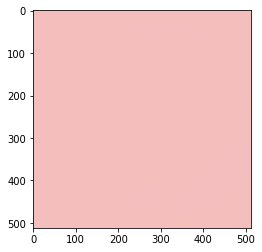

In [50]:

ps_obj = PopularitySampling(orig_img,k_image)
plt.imshow(ps_obj.quantized_image)
imsave('data/popularity{}_{}'.format(k_image,input_filename_wo_dir), ps_obj.quantized_image)

In [51]:
# ps_obj.topk_colors_list

<ipython-input-52-bb2b7b343b8e>:2: UserWarning: data/popularity_dither2_human.jpg is a low contrast image
  imsave('data/popularity_dither{}_{}'.format(k_image,input_filename_wo_dir), ps_obj.dithered_image)


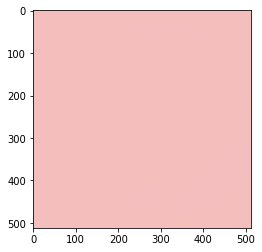

In [52]:
plt.imshow(ps_obj.dithered_image)
imsave('data/popularity_dither{}_{}'.format(k_image,input_filename_wo_dir), ps_obj.dithered_image)

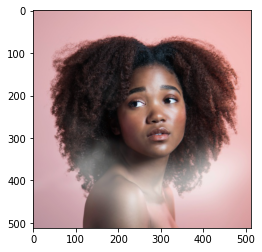

In [53]:
"""# Median Cut"""

# img = np.array(Image.open('/content/alain-chan-l-6DmVrHQYk-unsplash.jpg'))
orig_img = np.array(Image.open(input_file_name))
# img = np.array(Image.open('/content/janine-robinson-Dia3vG7_ruo-unsplash.jpg'))
plt.imshow(orig_img)

In [54]:
def colors_and_counts(img):

  '''
  Returns a list of colours present in the given RGB space along with the count of occurances of each 
  color, and the locations.  
  
  '''

  # a dictionary that holds each color combination and their occurances
  # keys: a string 'color'
  # values: list of RGB colors, their occurances count, and locations
  color_map = {}

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):

      # creating a string 'color' that represents the RGB combination of a specific color
      # for (17, 225, 157) -> color = '17225157' <type 'string'>
      color = str(img[i][j][0]) + str(img[i][j][1]) + str(img[i][j][2])

      # if a string color is already present updates occurances and locations, 
      # else updates dictionary with the new color combination
      if str(color) in color_map.keys():
        color_map[str(color)][3] += 1
        color_map[str(color)][-1].append((i, j))
      else:
        color_map.update({str(color):[img[i][j][0], img[i][j][1], img[i][j][2], 1, [(i, j)]]})
        
  # print('Getting colors and counts.....')
  return list(color_map.values())

In [55]:
def find_max_box_dimension(b):

  '''
  Returns the largest dimension of the color box b (Red, Green, or Blue).

  b -> single colour sub-box

  r range = maximum red value - minimum red value = b[3] - b[2]
  g range = maximum green value - minimum green value = b[5] - b[4]
  b range = maximum blue value - minimum blue value = b[7] - b[6]

  finding the channel/dimension having the maximum range
  
  '''
  
  # finding the ranges of each of the channels in the RGB space
  r_range = b[3] - b[2]
  g_range = b[5] - b[4]
  b_range = b[7] - b[6]
  # print('Finding maximum box dimension')
  if (r_range >= g_range) and (r_range >= b_range):
   return 0
  elif (g_range >= r_range) and (g_range >= b_range):
    return 1
  else:
    return 2

In [56]:
def create_color_box(C, level):

  '''
  Creates and returns a new color box containing the colors C. A
  color box b is a list [colors, level,rmin,rmax, gmin, gmax, bmin, bmax],
  where colors is the list of image colors represented by the box, level
  denotes the split-level, and rmin,... bmax describe the color boundaries of the box in RGB space. 


  b[0] = [[ r value, g value, b value, count, [(row, col), (row2, col2), ....... ()]  ],
            [ r value, g value, b value, count, [(row, col), (row2, col2), ....... ()]  ],
              [ r value, g value, b value, count, [(row, col), (row2, col2), ....... ()]  ],
              ....
          ]
  
  b[1] = level
  intitally all colours are present in level0
                        B0 (level0)
                        /\
                      B1  B2 (level1)
                     /\    /\
                   B3 B4  B5 B6 (level2)

  b[2] = minimum red value in the box
  b[3] = maximum red value in the box

  b[4] = minimum green value in the box
  b[5] = maximum green value in the box

  b[6] = minimum blue value in the box
  b[7] = maximum blue value in the box

  '''

  # colors = np.array(C)[:,:-1]
  colors = np.array(C)
  rmin = np.min(colors[:,0])
  rmax = np.max(colors[:,0])
  gmin = np.min(colors[:,1])
  gmax = np.max(colors[:,1])
  bmin = np.min(colors[:,2])
  bmax = np.max(colors[:,2])
  # print('Creating color box with level: ', level)
  return [colors.tolist(), level, rmin, rmax, gmin, gmax, bmin, bmax]

In [57]:
def find_box_to_split(B):

  '''
  Searches the set of boxes "B" for a box to split and returns this box, or
  nil if no splittable box can be found.
  
  '''

  # box_set represents the set of all color boxes that can be split (i.e., contain atleast
  # two different colors)
  box_set = []
  # print('Finding box to split....')

  # finds all the boxes in the "B" that have atleast two different colors present in them
  for box in B:
    if len(box[0]) >= 2:
      box_set.append(box)

  # if there are no boxes with atleast two different colors return, else find the box from
  # box_set that has the minimum level to be splitted
  if len(box_set) == 0:
    return
  else:
    min_level = float('inf')
    box_selected = box_set[0]
    for curr_box in B:
      # curr_box[1] represents the level of the current box
      if curr_box[1] < min_level:
        min_level = curr_box[1]
        box_selected = curr_box
    return box_selected

In [58]:
def split_box(box):

  '''
  Splits the color box b at the median plane perpendicular to its longest
  dimension and returns a pair of new color boxes.
  
  '''

  curr_level = box[1]

  # finds the dimension that has longest range
  dim = find_max_box_dimension(box)

  all_colors = box[0]
  all_colors = np.array(all_colors)
  # sorts the list of colors according to the values along the longest dimension
  all_colors = all_colors[all_colors[:, dim].argsort()]
  # finds the median index and creates two color spaces to create two new boxes in higher level
  median_index = int((len(all_colors) + 1) / 2)

  colors1 = all_colors[:median_index]
  colors2 = all_colors[median_index:]

  # print('Splitting the box.....')
  return (create_color_box(colors1, curr_level+1), create_color_box(colors2, curr_level+1))

In [59]:
def average_colors(box):

  '''
  Returns the average color Cavg for the pixels represented by the color box.
  '''

  all_colors = box[0]
  # N represents the total count of the colors
  N = 0
  # sum of the pixel values of each channel is computed separately
  rsum, gsum, bsum = 0, 0, 0

  for color in all_colors:
    count = color[3]
    N+=count
    rsum+=(count*color[0])
    gsum+=(count*color[1])
    bsum+=(count*color[2])
  ravg, gavg, bavg = rsum//N, gsum//N, bsum//N
  # print('Finding the average of the colors.....')
  return [ravg, gavg, bavg]

In [60]:
def find_representative_colors(image, Kmax, C):

  '''
  Returns a set of up to "Kmax" representative colors for the "image".
  '''

  image2 = image.copy()
  # if the total colors present initially are less than Kmax then return, else find the 
  # representative colors
  # "C" represents the total colors
  if len(C) <= Kmax:
    return C
  
  else:

    # initial level is zero
    level = 0

    # intitally all colours are present in level0
    #                     B0 (level0)
    #                     /\
    #                   B1  B2 (level1)
    #                  /\    /\
    #                B3 B4  B5 B6 (level2)

    # creating a box at level zero representing as "b0" with all the colors present in it
    b0 = create_color_box(C, level)
    # "box_set" represents the set of boxes created during the process of finding Kmax colors
    box_set = []
    box_set.append(b0)

    # "k" represents the count of boxes present in the box_set
    k = 1
    # "done" indicates if there are no more boxes to split
    done = False

    while (k < Kmax) and not done:
      
      selected_box = find_box_to_split(box_set)
      # if a box is selected, it is splitted into two other boxes, else the process is ended
      if len(selected_box)!=0:
        box1, box2 = split_box(selected_box)
        box_set.append(box1)
        box_set.append(box2)
        box_set.remove(selected_box)
        k+=1
      else:
        done = True

    # "Cavg_set" contains colors that are obtained by averaging colors of Kmax selected boxes
    Cavg_set = []
    color_map = {}
    for box in box_set:
        # the average value of the colors in a box are stored in Cavg
        Cavg = average_colors(box)
        for color in box[0]:
            color_map[(color[0],color[1],color[2])] = tuple(Cavg)
        Cavg_set.append(Cavg)
        box_colors = box[0]
        # iterating over all the pixel locations and updating the values with those of box average
        for i in range(len(box_colors)):
            for row_idx, col_idx in box_colors[i][-1]:
                image2[row_idx][col_idx] = Cavg
            
    # print('Finding Cavg values....')
    return image2, Cavg_set,color_map

In [61]:
def median_cut(image, Kmax):

  '''
  Returns a new quantized image with at most Kmax colors.
  '''

  CC = colors_and_counts(image)
  median, Cavg_set, color_map= find_representative_colors(image, Kmax, CC)

  return median, Cavg_set,color_map

In [62]:
# color_map

In [63]:
k_image = 2

<ipython-input-56-46056528abc8>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  colors = np.array(C)
<ipython-input-58-35f348b86f79>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_colors = np.array(all_colors)


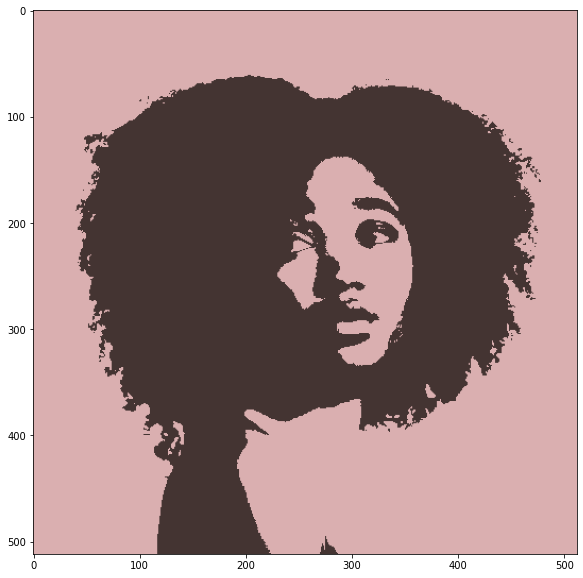

In [64]:
median_images = [k_image]
mediancut_dict = {}
for k_median in median_images:
    median,  cr ,color_map= median_cut(orig_img, k_median)
    mediancut_dict[k_median] = [median,color_map]
    plt.figure(figsize = (10, 10))
    plt.imshow(median)
    imsave('data/median{}.png'.format(str(k_median)), median)

In [65]:
len(cr),len(color_map)

(2, 36524)

# Dithering

In [66]:
# def closest_pixel(point, color_palette):

#   '''
#   Finds and returns the closest color to the point in the color_palette.

#   Computes the Eucledian distance of the point with each color in palette and
#   returns the color with least distance.
#   '''

#   min = float('inf')
#   closest = color_palette[0]
#   for i in color_palette:
#     dist = np.sqrt(np.sum(np.square(i-point)))
#     if dist <= min:
#       min = dist
#       closest = i
#   # print('Finding closest value.....')
#   return closest

# # Dithering

In [67]:
from sklearn.neighbors import KDTree
import random

In [68]:
list_colors = list(color_map.keys())
all_colors = np.array( list_colors )
tree = KDTree(all_colors, leaf_size=5)              


In [69]:
def find_closest_pixel_kd(this_color):
    dist, ind = tree.query([this_color], k=1)                
    return list_colors[ind[0][0]]

In [70]:
def dither2(img):

    '''
    Returns the dithered image by applying Floyd-Steinberg dithering algorithm 
    '''

    # "qimg" is a copy of the image and updates the pixels with closest color in palette
    qimg = img.copy()
    m_orig =qimg.shape[0]
    n_orig =qimg.shape[1]
    for i in range(m_orig):
        if i%100==0:
            print(i)
        for j in range(n_orig):     
            closest = color_map[find_closest_pixel_kd(qimg[i][j])]
            qimg[i][j] = closest
            # finding the quantization error
            err =    qimg[i][j] - closest 
            if i+1<m_orig:
                qimg[i+1][j] = qimg[i+1][j] + err * 3/8
            if j+1<n_orig:
                qimg[i][j+1] = qimg[i][j+1] + err * 3/8
            if i+1<m_orig and j+1<n_orig:
                qimg[i+1][j+1] = qimg[i+1][j+1] + err * 1/4
    return qimg

0
100
200
300
400
500


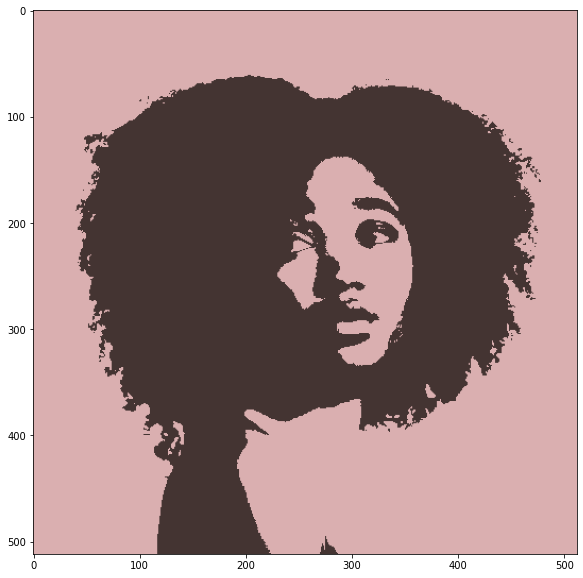

In [71]:
dither_median = dither2(orig_img)
plt.figure(figsize = (10, 10))
plt.imshow(dither_median)
imsave('data/dither_median{}.png'.format(k_image), dither_median)